# Understanding the Incremental Capital Output Ratio (ICOR)

## Introduction to ICOR

The Incremental Capital Output Ratio (ICOR) is an economic metric that measures the additional capital investment needed to generate an additional unit of output (e.g., GDP). It reflects the efficiency of capital utilization in an economy or industry.

Formula:
$$
\text{ICOR} = \frac{\text{Investment}}{\Delta \text{GDP}}
$$
 
Where:

* Investment = Capital invested during a period.
* ΔGDP = Change in GDP during the same period.

##### Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

##### Define ICOR Calculation

In [2]:
def calculate_icor(investment, delta_gdp):
    """
    Calculate ICOR given investment and change in GDP.
    """
    if delta_gdp == 0:
        return np.inf  # Avoid division by zero
    return investment / delta_gdp

##### Example Calculation

Assume a country invests $500 billion and achieves a GDP growth of $100 billion:

In [3]:
investment = 500  # in billions
delta_gdp = 100   # in billions
icor = calculate_icor(investment, delta_gdp)
print(f"ICOR = {icor:.2f}")
print(f"Interpretation: ${icor} of investment is required to generate $1 of additional output.")

ICOR = 5.00
Interpretation: $5.0 of investment is required to generate $1 of additional output.


##### Visualize ICOR Trends

We plot how ICOR changes with varying GDP growth:

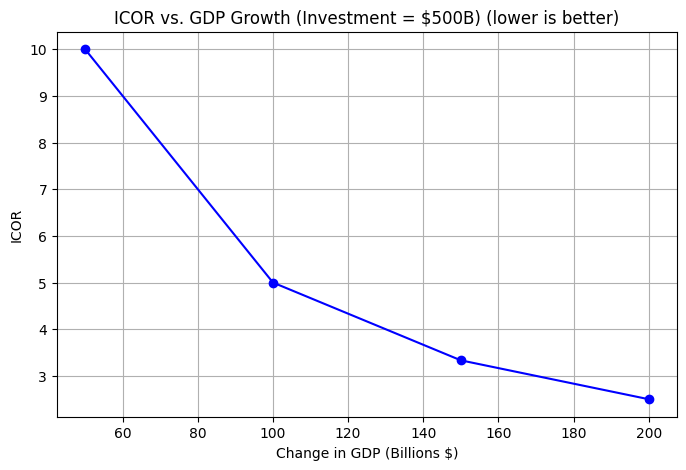

In [4]:
investments = np.array([500, 500, 500, 500])  # Constant investment
delta_gdp_range = np.array([50, 100, 150, 200])  # Varying GDP growth
icor_values = investments / delta_gdp_range

plt.figure(figsize=(8, 5))
plt.plot(delta_gdp_range, icor_values, marker='o', linestyle='-', color='b')
plt.xlabel('Change in GDP (Billions $)')
plt.ylabel('ICOR')
plt.title('ICOR vs. GDP Growth (Investment = $500B) (lower is better)')
plt.grid(True)
plt.show()

We see that as the change in GDP increases, the ICOR value decreases. 
We therefore interpretate that Higher GDP growth reduces ICOR, indicating improved efficiency.

* A high ICOR (e.g., 6) means the economy is inefficient in using capital. It requires $6 of investment to generate $1 of additional annual output. This is often characteristic of capital-intensive industries or economies with inefficient infrastructure or institutions. Diminishing returns or inefficient investment (e.g., infrastructure bottlenecks).

* A low ICOR (e.g., 3) means the economy is highly efficient. It only requires $3 of investment to generate $1 of additional annual output. This suggests productive investment. More efficient capital use (e.g., technological advancements).

Use Cases:

* Compare efficiency across countries/industries.
* Inform policy decisions (e.g., optimal investment levels).

##### Interactive ICOR Explorer
Use sliders to simulate investment and GDP growth scenarios:

In [5]:
def update_icor(Investment, ΔGDP):
    icor = calculate_icor(Investment, ΔGDP)
    print(f"Investment = ${Investment}B, ΔGDP = ${ΔGDP}B → ICOR = {icor:.2f}")

widgets.interactive(
    update_icor,
    Investment=widgets.IntSlider(min=100, max=1000, step=50, value=500),
    ΔGDP=widgets.IntSlider(min=10, max=200, step=10, value=100)
)

interactive(children=(IntSlider(value=500, description='Investment', max=1000, min=100, step=50), IntSlider(va…

##### Limitations of ICOR
* Assumes Linear Growth: Ignores external factors (e.g., inflation, labor productivity).
* Short-Term Focus: Long-term structural changes may not be captured.
* Data Sensitivity: Relies on accurate investment and GDP metrics.
---

# Introduction to the Harrod-Domar Model

Now that we have defined ICOR, which we may regard as an interest rate, we now must use this interest rate to calculate our returns given a certain amount of capital. In regards to economic growth of soverign economies, the amount of capital will be a percentage of the total GDP. We use a model from the Keynesian era to evaluate this.

The Harrod-Domar model is an early Keynesian model of economic growth that links growth rate to savings and capital productivity. It builds directly on the ICOR concept we just explored.

The basic formula is:
$$
g = \frac{s}{k} = s \times \frac{1}{\text{ICOR}}
$$

Where:

* g = growth rate
* s = savings rate (investment as percentage of GDP)
* k = capital-output ratio (ICOR)

We simplify the formula, and add a variable to account for depreciation:
$$
g = \frac{s}{\text{ICOR}} - \delta
$$

Where:
* delta = depreciation adjustment

Let's implement this model in our notebook

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Markdown

# Set up plotting style
plt.style.use('seaborn-v0_8-whitegrid')

##### Implementing the Harrod-Domar Model

In [7]:
def harrod_domar_model(savings_rate, icor, depreciation_rate=0.05):
    """
    Calculate growth rate using Harrod-Domar model
    
    Parameters:
    savings_rate: savings as percentage of GDP (0-1)
    icor: incremental capital output ratio
    depreciation_rate: capital depreciation rate (default 0.05)
    
    Returns:
    growth_rate: predicted economic growth rate
    """
    # Basic Harrod-Domar formula: g = s/k - d
    growth_rate = (savings_rate / icor) - depreciation_rate
    return growth_rate

# Example calculation
savings_rate = 0.25  # 25% of GDP
icor = 4.0           # ICOR of 4.0
depreciation = 0.05  # 5% depreciation

growth = harrod_domar_model(savings_rate, icor, depreciation)
print(f"Predicted growth rate: {growth:.2%}")

Predicted growth rate: 1.25%


##### Visualizing the Harrod-Domar Relationship

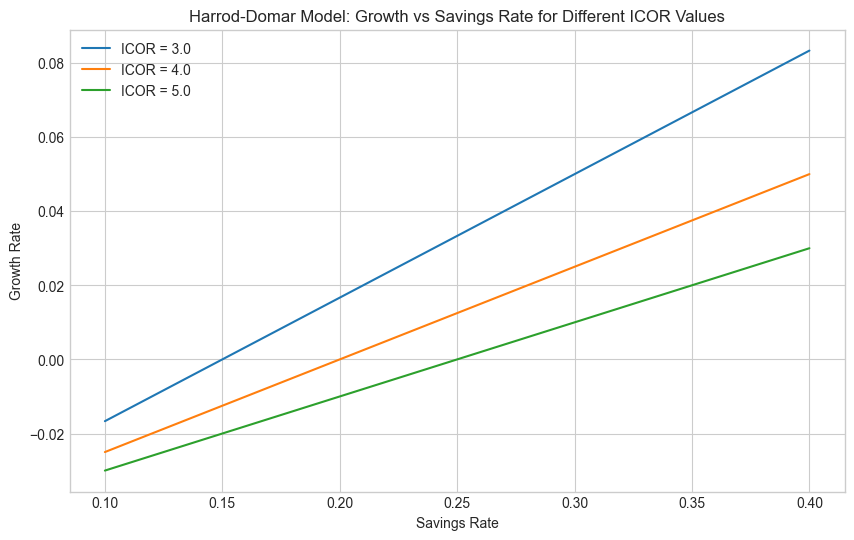

In [8]:
# Create a visualization of how growth changes with savings rate and ICOR
savings_rates = np.linspace(0.1, 0.4, 100)  # From 10% to 40% savings
icor_values = [3.0, 4.0, 5.0]  # Different ICOR values
depreciation = 0.05

plt.figure(figsize=(10, 6))
for icor_val in icor_values:
    growth_rates = harrod_domar_model(savings_rates, icor_val, depreciation)
    plt.plot(savings_rates, growth_rates, label=f'ICOR = {icor_val}')

plt.xlabel('Savings Rate')
plt.ylabel('Growth Rate')
plt.title('Harrod-Domar Model: Growth vs Savings Rate for Different ICOR Values')
plt.legend()
plt.grid(True)
plt.show()

We see that the increase in the proportion of capital invested increases the growth rate. We also compare with multiple ICOR values to see that a lower ICOR value leads to a higher growth rate

##### Interactive Harrod-Domar Explorer

In [9]:
# Create interactive widgets to explore the model
def update_harrod_domar(savings_rate, icor, depreciation_rate):
    growth_rate = harrod_domar_model(savings_rate/100, icor, depreciation_rate/100)
    
    # Display results
    display(Markdown(f"### Harrod-Domar Results"))
    display(Markdown(f"- **Savings rate**: {savings_rate}%"))
    display(Markdown(f"- **ICOR**: {icor}"))
    display(Markdown(f"- **Depreciation rate**: {depreciation_rate}%"))
    display(Markdown(f"- **Predicted growth rate**: {growth_rate:.2%}"))
    
    # Additional insight
    if growth_rate > 0.05:
        display(Markdown("📈 **High growth scenario**: Economy is growing rapidly"))
    elif growth_rate > 0.02:
        display(Markdown("📊 **Moderate growth scenario**: Steady economic expansion"))
    else:
        display(Markdown("📉 **Low growth scenario**: Economy needs stimulus"))

# Create interactive widgets
widgets.interact(
    update_harrod_domar,
    savings_rate=widgets.IntSlider(min=5, max=50, step=1, value=25, description='Savings Rate (%)'),
    icor=widgets.FloatSlider(min=1.0, max=10.0, step=0.1, value=4.0, description='ICOR'),
    depreciation_rate=widgets.FloatSlider(min=0.0, max=20.0, step=0.5, value=5.0, description='Depreciation (%)')
)

interactive(children=(IntSlider(value=25, description='Savings Rate (%)', max=50, min=5), FloatSlider(value=4.…

<function __main__.update_harrod_domar(savings_rate, icor, depreciation_rate)>

##### Comparing Countries Using Harrod-Domar
???

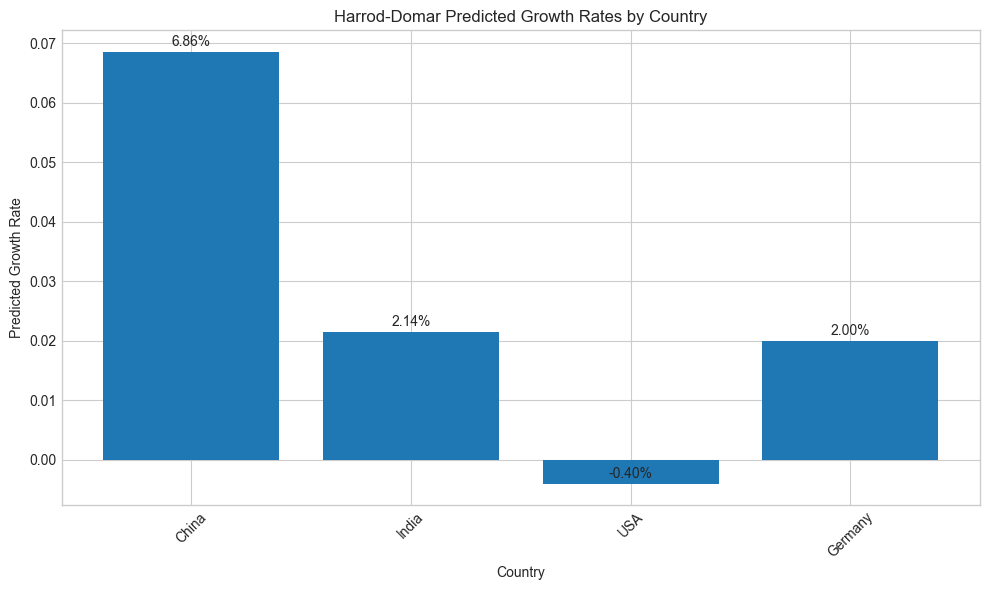

In [10]:
# Compare different countries using Harrod-Domar framework
countries = {
    'China': {'savings_rate': 0.45, 'icor': 3.5, 'depreciation': 0.06},
    'India': {'savings_rate': 0.30, 'icor': 4.2, 'depreciation': 0.05},
    'USA': {'savings_rate': 0.18, 'icor': 5.0, 'depreciation': 0.04},
    'Germany': {'savings_rate': 0.27, 'icor': 4.5, 'depreciation': 0.04},
}

# Calculate predicted growth rates
results = {}
for country, params in countries.items():
    growth = harrod_domar_model(
        params['savings_rate'], 
        params['icor'], 
        params['depreciation']
    )
    results[country] = growth

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Country')
plt.ylabel('Predicted Growth Rate')
plt.title('Harrod-Domar Predicted Growth Rates by Country')
plt.xticks(rotation=45)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.001, f'{v:.2%}', ha='center')
plt.tight_layout()
plt.show()

##### Policy Implications Exercise

In [11]:
# Interactive policy exercise
def policy_exercise(desired_growth, current_icor, current_savings, depreciation):
    # Calculate required savings rate for desired growth
    required_savings = (desired_growth + depreciation) * current_icor
    
    # Calculate required ICOR improvement for desired growth
    required_icor = current_savings / (desired_growth + depreciation)
    
    display(Markdown("### Policy Options Analysis"))
    display(Markdown(f"**Current situation:**"))
    display(Markdown(f"- Savings rate: {current_savings:.1%}"))
    display(Markdown(f"- ICOR: {current_icor}"))
    display(Markdown(f"- Depreciation: {depreciation:.1%}"))
    display(Markdown(f"- Current growth: {harrod_domar_model(current_savings, current_icor, depreciation):.2%}"))
    
    display(Markdown(f"**To achieve {desired_growth:.1%} growth:**"))
    display(Markdown(f"- Option 1: Increase savings rate to {required_savings:.1%} "
                   f"(increase of {(required_savings - current_savings):.1%} points)"))
    display(Markdown(f"- Option 2: Improve ICOR to {required_icor:.2f} "
                   f"(improvement of {(current_icor - required_icor):.2f} points)"))

# Run policy exercise
policy_exercise(
    desired_growth=0.06,
    current_icor=4.0,
    current_savings=0.25,
    depreciation=0.05
)

### Policy Options Analysis

**Current situation:**

- Savings rate: 25.0%

- ICOR: 4.0

- Depreciation: 5.0%

- Current growth: 1.25%

**To achieve 6.0% growth:**

- Option 1: Increase savings rate to 44.0% (increase of 19.0% points)

- Option 2: Improve ICOR to 2.27 (improvement of 1.73 points)

##### Remarks

The Harrod-Domar model provides a simple but powerful framework for understanding the relationship between investment, capital efficiency, and economic growth. While it has limitations (such as the "knife-edge" problem and assumption of fixed coefficients), it remains useful for:

* Understanding the importance of savings and investment for growth
* Highlighting the role of capital efficiency (ICOR)
* Providing a starting point for more sophisticated growth models

This notebook has shown how to implement the model, visualize its predictions, and apply it to real-world policy questions.
---

# Limitations of Harrod-Domar